# Notebook #3: Gestión de Outliers

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
#from src import soporte_asunciones as sa
from src import soporte_preprocesamiento as sp

- Importamos el dataframe generado en el notebook anterior.

In [2]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo3/df_encoded.pkl')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0.145815,0.147368,6,0.188742,0.164869,0.152350,0.147766,0.144828,0.117483,131160,1.0,11,0.166667,1.0,0.057971,1,0,0,0.137787,0.112705,0.170868,0.153017,0.156863
1,31,1,0.257627,0.155273,10,0.149171,0.164869,0.152350,0.147766,0.175325,0.260606,41890,0.0,23,0.149137,6.0,0.172745,5,1,4,0.137787,0.163265,0.179487,0.157360,0.176471
2,32,0,0.257627,0.155273,17,0.152745,0.111111,0.164731,0.153153,0.167147,0.117483,193280,1.0,15,0.166667,5.0,0.172650,5,0,3,0.146179,0.163265,0.325301,0.153017,0.156863
3,38,0,0.075949,0.155273,2,0.153846,0.164869,0.164731,0.140351,0.129630,0.117483,83210,3.0,11,0.166667,13.0,0.132812,8,7,5,0.133909,0.112705,0.139186,0.157360,0.156863
4,32,0,0.145815,0.155273,10,0.149171,0.164609,0.164731,0.147766,0.167147,0.260606,23420,4.0,12,0.169697,9.0,0.172650,6,0,4,0.133909,0.229236,0.139186,0.153017,0.156863


- Transformamos las columnas que deben ser categóricas pero durante el encoding se han convertido en numéricas.

In [3]:
df[['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating']] = df[['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating']].astype(str)

In [4]:
col_numericas = df.select_dtypes(include=np.number).columns
contaminacion = [0.01, 0.05]
estimadores = [25, 50, 75]

outliers = sp.outliers_isolation_forest(df, contaminacion, estimadores)
outliers.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1,1,1,1,1,1
1,31,1,0.2576271186440678,0.1552734375,10,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.17532467532467533,0.2606060606060606,41890,0.0,23,0.14913657770800628,6.0,0.1727447216890595,5,1,4,0.13778705636743216,0.16326530612244897,0.1794871794871795,0.15736040609137056,0.17647058823529413,1,1,1,1,1,1
2,32,0,0.2576271186440678,0.1552734375,17,0.15274463007159905,0.1111111111111111,0.16473072861668428,0.15315315315315314,0.16714697406340057,0.11748251748251748,193280,1.0,15,0.16666666666666666,5.0,0.17264957264957265,5,0,3,0.1461794019933555,0.16326530612244897,0.3253012048192771,0.15301724137931033,0.1568627450980392,1,1,1,1,1,1
3,38,0,0.0759493670886076,0.1552734375,2,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.14035087719298245,0.12962962962962962,0.11748251748251748,83210,3.0,11,0.16666666666666666,13.0,0.1328125,8,7,5,0.13390928725701945,0.11270491803278689,0.139186295503212,0.15736040609137056,0.1568627450980392,1,1,1,1,1,1
4,32,0,0.14581458145814583,0.1552734375,10,0.14917127071823205,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.16714697406340057,0.2606060606060606,23420,4.0,12,0.1696969696969697,9.0,0.17264957264957265,6,0,4,0.13390928725701945,0.2292358803986711,0.139186295503212,0.15301724137931033,0.1568627450980392,1,1,1,1,1,1


- Aplicaremos ahora un filtro para quedarmos con aquellos registros donde, 4 de 6 combinaciones resulten ser outliers.

In [5]:
cantidad_col = 4
df_filtrado = df[(df == -1).sum(axis=1) > cantidad_col]
df_filtrado.shape

(15, 31)

- Vemos que, nos hemos quedado sin outliers en el DF filtrado.

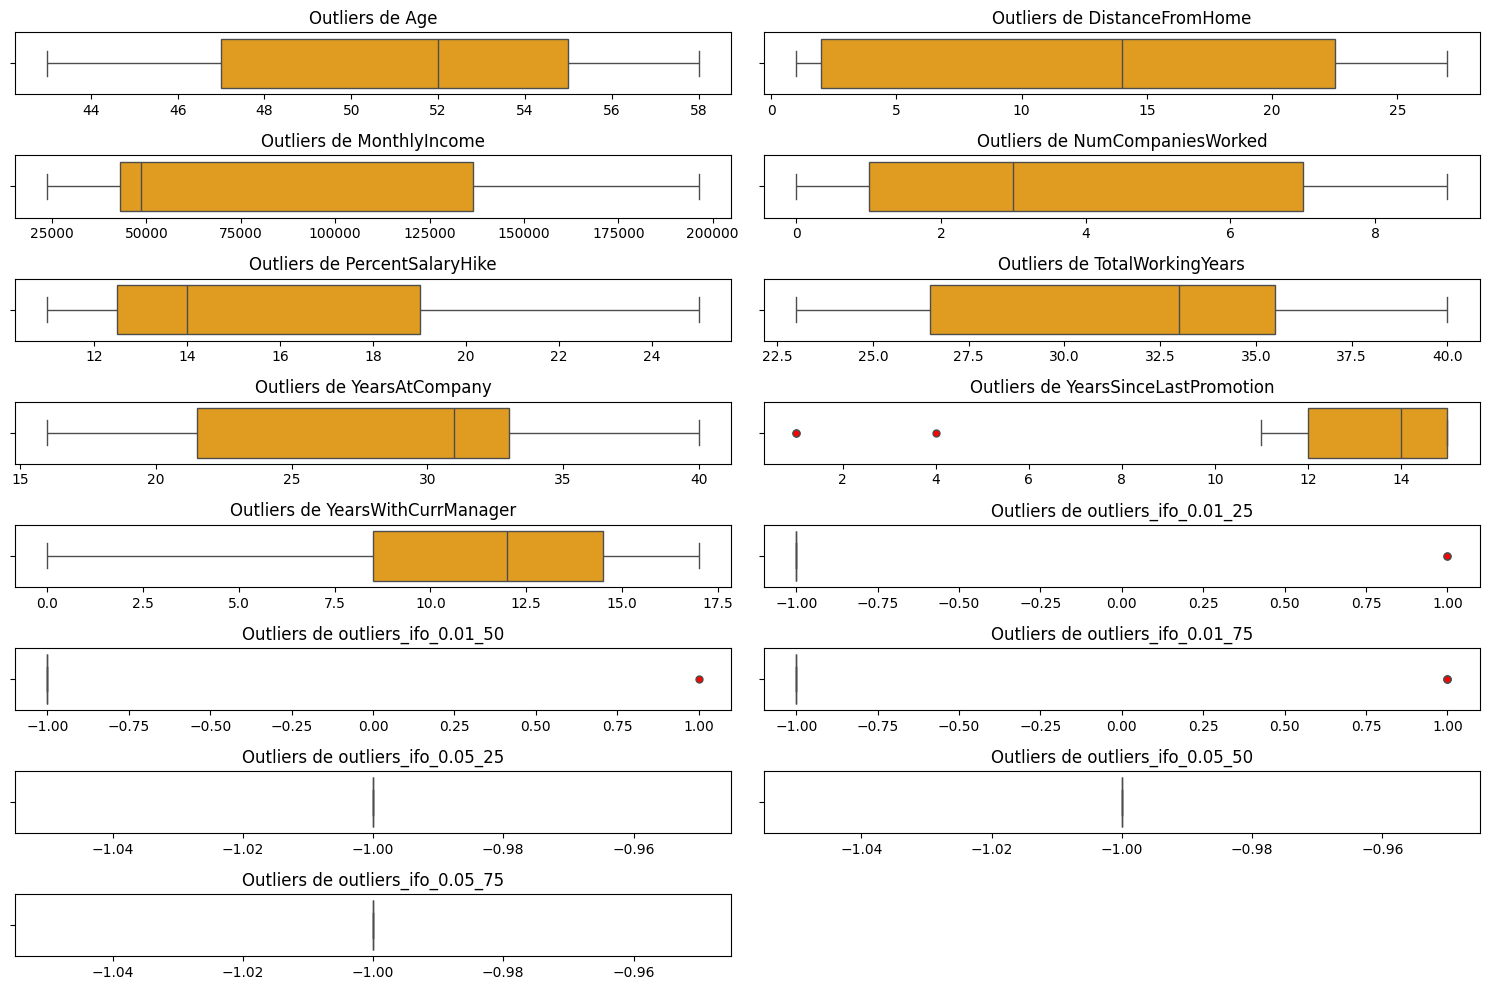

In [6]:
sp.detectar_outliers(df_filtrado)

- En total, hemos identificado sólamente 16 outliers, de un total de unos 1600 registros. Por ese motivo, en este segundo modelo, los eliminaremos del dataset.

In [7]:
df = df.drop(df_filtrado.index)

In [8]:
col_numericas

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

- Eliminamos las columnas que ha creado el método IFO.

In [9]:
df.drop(columns= ['outliers_ifo_0.01_25', 'outliers_ifo_0.01_50', 'outliers_ifo_0.01_75',
       'outliers_ifo_0.05_25', 'outliers_ifo_0.05_50', 'outliers_ifo_0.05_75'], inplace= True)

- Y guardamos el DF para llevarlo al siguiente paso: la estandarización.

In [10]:
with open('../../datos/pickles_transformados/modelo3/df_sinoutliers.pkl', 'wb') as f:
    pickle.dump(df, f)